# Count number of Lemons using Machine Learning


## Objective: 
##### To segment and count all the lemons present in an image given by the user


## Explanation
##### Here, I developed a python based tool to read an image given by the user, segment and count the number of lemons in the image. Accept the image input by the user and display the result along with each lemon segmented separately, count of lemons in the image and time taken for code to execute. Generalize the thresholds in your code so as to detect and count lemons in a variety of images.


## Used
##### contour detection and Watershed. 
##### Open CV and skimage.


## Steps Involved/approach:
##### 1. Read an image
##### 2. Convert to HSV
##### 3. Threshold it
##### 4. Blur it
##### 5. Remove extra / unwanted area
##### 6. Draw contours over original image and print both together
##### 7. Use watershed to detect touching contours
##### 8. Take avg of watershed and contours detection to give satisfactory results.


### Steps for Preprocessing

##### a) HSV split. (hue, saturation, value). This is the colour model which human eyes perceive.
##### b) Thresholding technique. This converts an image to a binary image (i.e. with only 2 pixel values either 0 or 255 etc) w.r.t a chosen threshold pixel intensity.
##### c) Blurring the image to remove un-necessary spots in the image.


## Source Code

In [1]:
#Import Libraries

from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import cv2
from IPython.display import display, Image 
import skimage.io as sk
import matplotlib.pyplot as plt              # for visualising images
%matplotlib inline    
import time                                  # for execution time

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
# Defining a function to rum diffrent images given by the user
def main_func(fp):
    
    # Execution start time
    start_time = time.time()
    
    # Create a function to visualize an image which will be used throughout the code.
    def show(img):
        plt.imshow(img)
        plt.show()
   
    # This is your image.
    print('The original Image')
    show(img)

    #Convert to HSV
    print('After Converting it to HSV')
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    show(hsv)

    h, s, v = cv2.split(hsv)
    show(s)

    # Threshold it
    print('After Threshold')
    _, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    show(thr)

    # Blur it
    print('After Blurring it')
    blur = cv2.medianBlur(thr, 5)
    show(blur)

    # Draw contours over original image and print both together and Remove extra / unwanted area
    contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    count = []
    for x in contours:
        area = cv2.contourArea(x)
        if area > 1000 :
            count.append(x)

    # Now we use watershed algorithm to separate out lemons which touch each other (if any).
    D = ndimage.distance_transform_edt(thr)
    localMax = peak_local_max(D, indices=False, min_distance=40, labels=thr)
    markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
    labels = watershed(-D, markers, mask=thr)
    ws = len(np.unique(labels)) -1

    # Take avg of watershed and contours detection to give satisfactory results.
    print('Finally, we take average of 2 methods and print the results')
    ans = int((ws + len(count)) / 2)
    print("Number of lemon segments detected = ", ans)
    cv2.drawContours(img, count, -1, (255,0,0), 3)
    show(img)
    
    # Execution end time of a code
    end_time = time.time()
    
    # Time taken for code to execute
    print('Time taken for code to execute; ', end_time-start_time, 'seconds')

In [3]:
# Enter the number that how many times the user want to take the input
n=input('Enter the number: ')

Enter the number: 5


In [ ]:
print('Image can be entered', n, 'times')

Image can be entered 5 times


 Enter your Image name: lemons1.jpeg
The original Image


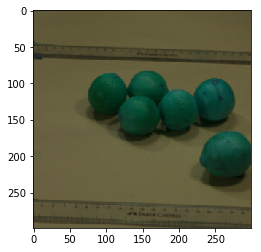

After Converting it to HSV


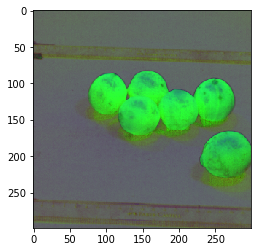

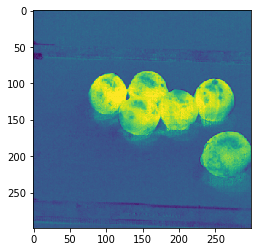

After Threshold


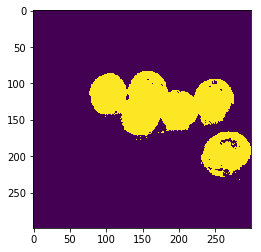

After Blurring it


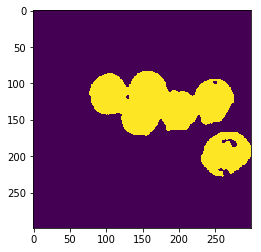

Finally, we take average of 2 methods and print the results
Number of lemon segments detected =  2


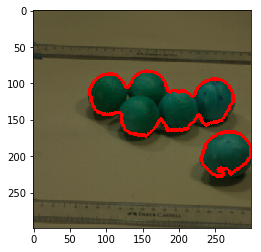

Time taken for code to execute;  2.4212687015533447 seconds
 Enter your Image name: lemon4-586.jpg
The original Image


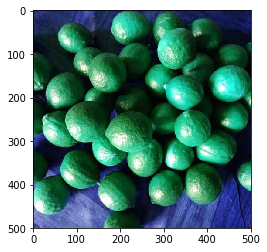

After Converting it to HSV


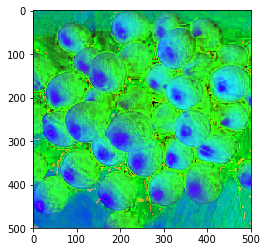

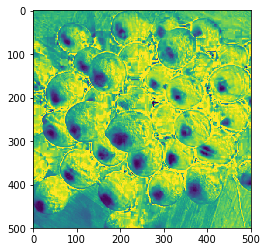

After Threshold


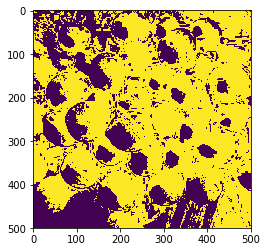

After Blurring it


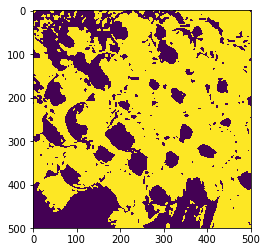

Finally, we take average of 2 methods and print the results
Number of lemon segments detected =  13


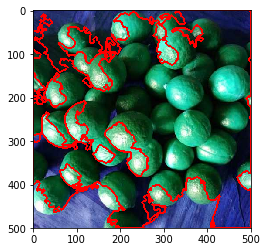

Time taken for code to execute;  2.640035390853882 seconds


In [ ]:
# Now, give the user input Image and read the image
while(n):
    fp = input(" Enter your Image name: ")
    img = cv2.imread(fp)
    main_func(fp)